In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('data.csv')
data


,-log(C),Amax/Abs QPR,lambda dpr,Integral,Max Synthesis,lambda dpr synthesis,Cat
0,4.823909,1.506518,800,425.40,2.382,692,1
1,4.698970,1.569472,800,414.47,2.382,692,1
2,4.602060,1.634921,803,418.34,2.382,692,1
3,4.522879,1.671260,805,427.08,2.382,692,1
4,4.455932,1.694779,805,423.42,2.382,692,1
...,...,...,...,...,...,...,...
85,4.086186,2.048055,793,412.62,2.410,698,1
86,3.769551,2.034722,786,404.20,2.410,698,2
87,3.677781,2.023041,785,406.83,2.410,698,2
88,3.545155,2.008909,783,415.71,2.410,698,2


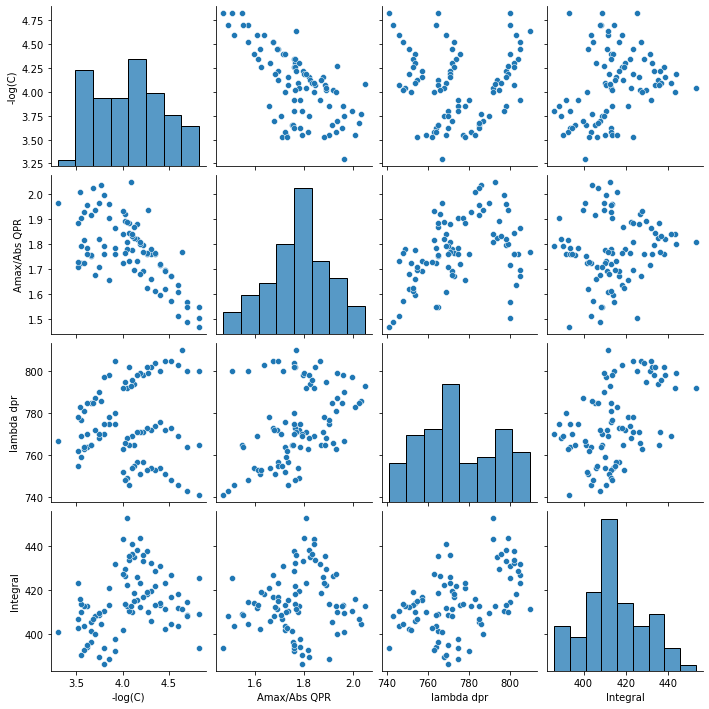

In [19]:
sns.pairplot(data[['-log(C)','Amax/Abs QPR','lambda dpr','Integral']])

In [62]:

X = data.iloc[:83,1:6]
y = data.iloc[:83,0]
X_test = data.iloc[83:,1:6]
y_test = data.iloc[83:,0]


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(np.array(y).reshape(-1,1))
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(np.array(y_test).reshape(-1,1))
y_test

array([[ 1.73404061],
       [ 0.88353113],
       [ 0.43888976],
       [-0.30391148],
       [-0.51919764],
       [-0.8303269 ],
       [-1.4030255 ]])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [64]:
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(16,input_shape=(5,),activation='relu',kernel_initializer='normal'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation='selu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation='exponential'))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [65]:
model.fit(X,y,epochs=64,batch_size=16)

Epoch 1/64
6/6 [==============================] - 1s 2ms/step - loss: 1.3288
Epoch 2/64
6/6 [==============================] - 0s 940us/step - loss: 0.9531
Epoch 3/64
6/6 [==============================] - 0s 701us/step - loss: 0.6914
Epoch 4/64
6/6 [==============================] - 0s 3ms/step - loss: 0.5007
Epoch 5/64
6/6 [==============================] - 0s 4ms/step - loss: 0.4053
Epoch 6/64
6/6 [==============================] - 0s 4ms/step - loss: 0.3688
Epoch 7/64
6/6 [==============================] - 0s 1ms/step - loss: 0.3477
Epoch 8/64
6/6 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 9/64
6/6 [==============================] - 0s 3ms/step - loss: 0.2328
Epoch 10/64
6/6 [==============================] - 0s 3ms/step - loss: 0.1114
Epoch 11/64
6/6 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 12/64
6/6 [==============================] - 0s 3ms/step - loss: 0.1598
Epoch 13/64
6/6 [==============================] - 0s 3ms/step - loss

In [66]:
from sklearn.metrics import r2_score
pred_train = model.predict(X)
print(r2_score(y,pred_train))

pred = model.predict(X_test)
print(r2_score(y_test,pred))

3/3 [==============================] - 0s 4ms/step
0.9792625969407759
1/1 [==============================] - 0s 7ms/step
0.7947521585757221


In [27]:
def baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(16,input_shape=(5,),activation='relu',kernel_initializer='normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64,activation='selu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16,activation='selu'))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error',optimizer='rmsprop')
    return model

In [28]:
from keras import models,layers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import KFold

estimator = KerasRegressor(model=baseline_model, epochs=64, batch_size=16, verbose=0)
'''kfold = KFold(n_splits=3,shuffle=True)
results = cross_validate(estimator, X, y, cv=kfold, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(results['test_neg_mean_squared_error'])
print("train_r2_score:",results['train_r2'])
print("test_r2_score:",results['test_r2'])'''
for k in range(2,6):
    kfold = KFold(n_splits=k,shuffle=True,random_state = 10)
    results = cross_validate(estimator, X, y, cv=kfold, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    print("k = " + str(k))
    print(results['test_neg_mean_squared_error'])
    print("train_r2_score:",results['train_r2'])
    print("test_r2_score:",results['test_r2'])

k = 2
[-0.0472865  -0.05427117]
train_r2_score: [0.96816755 0.97259343]
test_r2_score: [0.9492754  0.94744788]
k = 3
[-0.05050654 -0.05528172 -0.03513744]
train_r2_score: [0.97132109 0.9776556  0.96803297]
test_r2_score: [0.95175424 0.94730047 0.96084429]
k = 4
[-0.04254117 -0.1158093  -0.0862352  -0.05208405]
train_r2_score: [0.95418329 0.92281858 0.96523016 0.95855114]
test_r2_score: [0.96410856 0.83750623 0.92610544 0.93882226]
k = 5
[-0.03587513 -0.04659635 -0.14539935 -0.04427741 -0.06339522]
train_r2_score: [0.96582865 0.97155023 0.96184509 0.97055711 0.96407586]
test_r2_score: [0.97125982 0.93660356 0.85867147 0.95752372 0.92620683]


In [67]:
pred = sc.inverse_transform(model.predict(X_test))
y_true =  sc.inverse_transform(y_test)
y_true

1/1 [==============================] - 0s 21ms/step


array([[4.63827216],
       [4.27572413],
       [4.08618615],
       [3.76955108],
       [3.6777807 ],
       [3.54515514],
       [3.30103   ]])

In [68]:
MSE = ((pred-y_true)**2).mean()
RMSE = MSE ** 0.5
print("RMSE = " + str(RMSE))

RMSE = 0.19311928934201736


In [69]:
max_y = y_true + RMSE
min_y = y_true - RMSE
C_max = (10 ** (-max_y)) * (10 ** 6)
MSE_C = ((C_max - (10 ** (-y_true)) * (10 ** 6)) ** 2).mean()
RMSE_C = MSE_C ** 0.5
RMSE_C

87.32841558429729